In [68]:
import requests
# Import libraries to be used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math
import seaborn as sns
from matplotlib import gridspec

# Magic to show the plots within the notebook:
%matplotlib inline 

pd.set_option('display.max_rows', 300) # specifies number of rows to show

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.tail()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
2697733,0,2,17,a7949139c6ac6b857d22dbd098bbff23,1,u_Vh1DCeT0DqEyJOj,windows_ie,123.191.94.*,40,41,...,90,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,"10063,10059,10111"
2697734,0,3,15,28d5ba2b59911217d93c99969053172e,1,u_VhTdLe1dPob9jmB,windows_chrome,112.90.239.*,216,231,...,90,0,0,133,7184c9560e68e977187e67e45a4f3198,238,149,0f951a030abdaedd733ee8d114ce2944,3427,"13800,10024,10057"
2697735,0,2,0,42c67d24b0adb9f269e365d4ec76f7e0,1,u_VhCEL3qtL2j9DVf,windows_ie,123.88.195.*,216,217,...,250,2,0,5,8dff45ed862a740986dbe688aafee7e5,249,77,15b749127478946f161a54dc0dad27c8,3476,"10057,10063,13866,10006,10110"
2697736,0,0,19,9792657ec784429e5720a2e1dbd496f4,1,u_VhdALuRIP9FOjBB,windows_other,112.228.125.*,146,159,...,90,0,0,20,d01411218cc79bc49d2a4078c4093b76,241,95,b2e35064f3549d447edbbdfb1f707c8c,3427,"10006,10063,10059,10110"
2697737,0,1,0,459006debcd6ae06a3fa0bea497f6b6b,1,u_Vhk0Pwf8P4cflsc,windows_ie,123.83.105.*,65,66,...,90,1,0,5,b90c12ed2bd7950c6027bf9c6937c48a,300,31,361e128affece850342293213691a043,3386,"10006,10063,10059,10052,10093,10083,10111"


In [5]:
check = df_train['bidprice']>df_train['payprice']
pd.DataFrame(check)

print('------ hour (1458) ------')
print(check.value_counts().sort_index(ascending=True))

------ hour (1458) ------
False      36699
True     2661039
dtype: int64


In [6]:
df_1458 = df_train.loc[df_train.advertiser == 1458]
df_3358 = df_train.loc[df_train.advertiser == 3358]

# Outline

**(1) Basic Statistics**  
**(2) User Feedback** ... depict a graph for each feature
    - Weekday
    - Hour
    - OS
    - Browser
    - Region
    - Slotsize
    - Adexchange
    (- All) 

# (1) Basic Statistics

In [70]:
# Imps
Imps = df_train['advertiser'].value_counts().sort_index(ascending=False)
# Clicks
Clicks = df_train.pivot_table(index='advertiser',values='click', aggfunc = 'sum')
# Cost
Cost_fen = df_train.pivot_table(index='advertiser',values='payprice', aggfunc = 'sum')
Cost = Cost_fen/1000
Cost = round(Cost, 0)
# CTR
CTR_rate = Clicks / Imps
CTR = round((CTR_rate*100), 3).astype(str) + '%'
# CPM
CPM = Cost*1000/Imps
# eCPC
eCPC = Cost/Clicks

stat = pd.concat([Imps, Clicks, Cost, CTR, CPM, eCPC], axis=1)
stat.columns = ['Imps', 'Clicks', 'Cost', 'CTR', 'CPM', 'eCPC']

In [71]:
stat

,Imps,Clicks,Cost,CTR,CPM,eCPC
advertiser,,,,,,
1458,540293,451,37231.0,0.083%,68.908907,82.552106
2259,146778,45,13649.0,0.031%,92.990775,303.311111
2261,120619,37,10789.0,0.031%,89.446936,291.594595
2821,231416,144,20626.0,0.062%,89.129533,143.236111
2997,54487,251,3413.0,0.461%,62.638795,13.597610
3358,304782,233,28145.0,0.076%,92.344692,120.793991
3386,498554,358,38341.0,0.072%,76.904408,107.097765
3427,454031,340,36820.0,0.075%,81.095784,108.294118
3476,346778,175,27481.0,0.05%,79.246665,157.034286


# (2) User Feedback 

# Weekday

In [7]:
weekday1458 = df_1458[["click", 'weekday']] 
weekday3358 = df_3358[["click", 'weekday']]

In [8]:
weekday1458_g = weekday1458.groupby('weekday')
weekday3358_g = weekday3358.groupby('weekday')

n_of_click_1458 = weekday1458_g.sum().click
n_of_click_3358 = weekday3358_g.sum().click

In [9]:
n_of_impressions1458 = pd.DataFrame(weekday1458['weekday'].value_counts().sort_index(ascending=True))
n_of_impressions3358 = pd.DataFrame(weekday3358['weekday'].value_counts().sort_index(ascending=True))

In [10]:
weekday1458_graph = pd.concat([n_of_click_1458, n_of_impressions1458], axis = 1)
weekday3358_graph = pd.concat([n_of_click_3358, n_of_impressions3358], axis = 1)

In [11]:
weekday1458_graph['CTR'] = weekday1458_graph['click']/weekday1458_graph['weekday'].astype(int)
weekday3358_graph['CTR'] = weekday3358_graph['click']/weekday3358_graph['weekday'].astype(int)

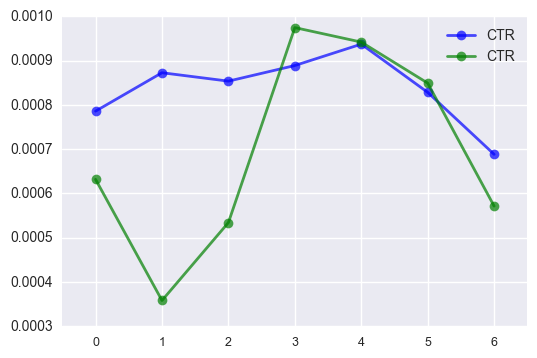

In [12]:
# Set x-axis
w = 0.3 # width of the bar
#left = np.arange(len(np.array(weekday1458_graph['CTR'])))
plt.subplot()
plot1 = plt.plot(weekday1458_graph["CTR"], 'o-', linewidth=2, color = 'b', alpha=0.7)
plot2 = plt.plot(weekday3358_graph["CTR"], 'o-', linewidth=2, color = 'g', alpha=0.7)
plt.legend()
plt.xlim(-0.5, 6.5)
plt.xticks(weekday1458_graph.index, fontsize=9)
plt.show()

# Hour

In [13]:
hour1458 = df_1458[["click", 'hour']] 
hour3358 = df_3358[["click", 'hour']]

In [14]:
# print('------ hour (1458) ------')
# print(hour1458['hour'].value_counts().sort_index(ascending=True))
# print('------ browser (3358) ------')
# print(hour3358['hour'].value_counts().sort_index(ascending=True))

n_hour1458 = pd.DataFrame(hour1458['hour'].value_counts().sort_index(ascending=True))
n_hour3358 = pd.DataFrame(hour3358['hour'].value_counts().sort_index(ascending=True))

In [15]:
hour1458_pivot = hour1458.groupby(["hour", "click"]).size().reset_index(name="Count")
hour3358_pivot = hour3358.groupby(["hour", "click"]).size().reset_index(name="Count")

In [16]:
hour1458_trial = pd.DataFrame(hour1458_pivot[hour1458_pivot.click==1])
hour1458_trial.index = np.array(hour1458_trial.hour)

hour3358_trial = pd.DataFrame(hour3358_pivot[hour3358_pivot.click==1])
hour3358_trial.index = np.array(hour3358_trial.hour)

hour1458_graph = pd.concat([n_hour1458, hour1458_trial['Count']], axis = 1)
hour3358_graph = pd.concat([n_hour3358, hour3358_trial['Count']], axis = 1)

# Fill out NaN in 0
hour_1458 = hour1458_graph.fillna(0)
hour_3358 = hour3358_graph.fillna(0)

hour_1458['1458'] = hour_1458['Count']/hour_1458['hour'].astype(int)
hour_3358['3358'] = hour_3358['Count']/hour_3358['hour'].astype(int)

hour_1458['1458'] = hour_1458['1458'].replace('inf', 0)
hour_3358['3358'] = hour_3358['3358'].replace('inf', 0)

/Users/nishimuraaki/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


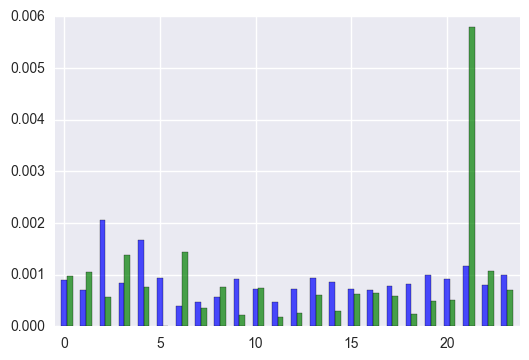

In [17]:
# Set x-axis
w = 0.3 # Width of the bar
left = np.arange(len(np.array(hour_1458['1458'])))

plt.subplot()
plot = plt.bar(left, np.array(hour_1458['1458']), width=0.3, align="center", color = 'b', alpha=0.7)
plot = plt.bar(left + w, np.array(hour_3358['3358']), width=0.3, align="center", color = 'g', alpha=0.7)
plt.legend()
plt.xlim(-0.5, 23.8)
#plt.xticks(left + w/2, ['chrome', 'firefox', 'ie', 'maxthon', 'opera', 'other', 'safari', 'sogou', 'theworld'], fontsize=9)
plt.show()

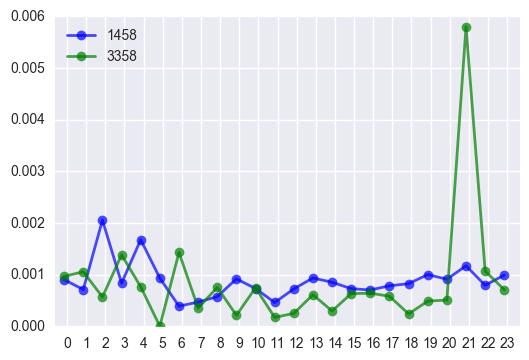

In [18]:
plt.subplot()
plot1 = plt.plot(hour_1458["1458"], 'o-', linewidth=2, color = 'b', alpha=0.7)
plot2 = plt.plot(hour_3358["3358"], 'o-', linewidth=2, color = 'g', alpha=0.7)
plt.legend(loc='best')
plt.xlim(-0.5, 23.8)
plt.xticks(left + w/2, range(24))
plt.show()

# OS

In [19]:
ua1458 = df_1458[["click", 'useragent']] 
ua3358 = df_3358[["click", 'useragent']]

In [20]:
array1458 = np.array(df_1458['useragent'])
split1458 = []
for i in range(len(array1458)):
    split1458.append(array1458[i].split("_"))

spl_df1458 = pd.DataFrame(split1458)

In [21]:
array3358 = np.array(df_3358['useragent'])
split3358 = []
for i in range(len(array3358)):
    split3358.append(array3358[i].split("_"))

spl_df3358 = pd.DataFrame(split3358)

In [22]:
spl_df1458.columns = ['OS', 'Browser']
spl_df3358.columns = ['OS', 'Browser']

In [23]:
# 1458
ua1458.index = range(len(ua1458))
useragent1458_df = pd.concat([ua1458, spl_df1458], axis=1)
OS1458 = useragent1458_df.drop(['useragent', 'Browser'], axis=1)
Browser1458 = useragent1458_df.drop(['useragent', 'OS'], axis=1)

# 3358
ua3358.index = range(len(ua3358))
useragent3358_df = pd.concat([ua3358, spl_df3358], axis=1)
OS3358 = useragent3358_df.drop(['useragent', 'Browser'], axis=1)
Browser3358 = useragent3358_df.drop(['useragent', 'OS'], axis=1)

In [24]:
print('------ os (1458) ------')
print(OS1458['OS'].value_counts().sort_index(ascending=False))
print('------ os (3358) ------')
print(OS3358['OS'].value_counts().sort_index(ascending=False))

------ os (1458) ------
windows    524194
other         787
mac         11438
linux         298
ios           104
android      3472
Name: OS, dtype: int64
------ os (3358) ------
windows    289165
other         232
mac         10786
linux         226
ios            69
android      4304
Name: OS, dtype: int64


In [25]:
os1458_pivot = OS1458.groupby(["OS", "click"]).size().reset_index(name="Count")
os3358_pivot = OS3358.groupby(["OS", "click"]).size().reset_index(name="Count")
os3358_pivot

,OS,click,Count
0,android,0,4287
1,android,1,17
2,ios,0,68
3,ios,1,1
4,linux,0,226
5,mac,0,10751
6,mac,1,35
7,other,0,231
8,other,1,1
9,windows,0,288986


In [26]:
os1458_pivot 

,OS,click,Count
0,android,0,3452
1,android,1,20
2,ios,0,104
3,linux,0,298
4,mac,0,11398
5,mac,1,40
6,other,0,787
7,windows,0,523803
8,windows,1,391


In [27]:
print(os1458_pivot[os1458_pivot.click==1])
print(os3358_pivot[os3358_pivot.click==1])

        OS  click  Count
1  android      1     20
5      mac      1     40
8  windows      1    391
         OS  click  Count
1   android      1     17
3       ios      1      1
6       mac      1     35
8     other      1      1
10  windows      1    179


In [28]:
os1458_graph = pd.DataFrame([20/3472, 0, 0, 40/11438, 0, 391/524194])
os3358_graph = pd.DataFrame([17/4304, 1/69, 0, 35/10786, 1/232, 179/289165])

os1458_graph.columns = ['1458CTR']
os3358_graph.columns =  ['3358CTR']

# os1458_graph.index = ['android', 'ios', 'linux', 'mac', 'other', 'windows']
# os3358_graph.index = ['android', 'ios', 'linux', 'mac', 'other', 'windows']
index = pd.DataFrame(['android', 'ios', 'linux', 'mac', 'other', 'windows'], columns=['index'])
os_graph = pd.concat([index, os1458_graph, os3358_graph], axis=1)
os_graph

,index,1458CTR,3358CTR
0,android,0.005760,0.003950
1,ios,0.000000,0.014493
2,linux,0.000000,0.000000
3,mac,0.003497,0.003245
4,other,0.000000,0.004310
5,windows,0.000746,0.000619


In [29]:
os1458_graph

,1458CTR
0,0.005760
1,0.000000
2,0.000000
3,0.003497
4,0.000000
5,0.000746


/Users/nishimuraaki/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


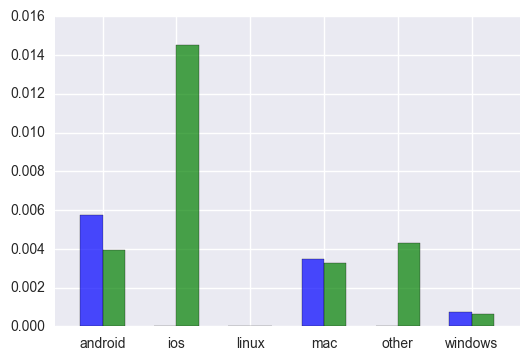

In [30]:
# Set x-axis
w = 0.3 # width of the bar
left = np.arange(len(np.array(os1458_graph)))

plt.subplot()
plot = plt.bar(left, np.array(os1458_graph), width=0.3, align="center", color = 'b',alpha=0.7)
plot = plt.bar(left + w, np.array(os3358_graph), width=0.3, align="center", color = 'g', alpha=0.7)
plt.legend()
plt.xlim(-0.5, 5.8)
plt.xticks(left + w/2, ['android', 'ios', 'linux', 'mac', 'other', 'windows'])
plt.show()

# Browser

In [31]:
print('------ browser (1458) ------')
print(Browser1458['Browser'].value_counts().sort_index(ascending=True))
print('------ browser (3358) ------')
print(Browser3358['Browser'].value_counts().sort_index(ascending=True))

n_bs1458 = pd.DataFrame(Browser1458['Browser'].value_counts().sort_index(ascending=True))
n_bs3358 = pd.DataFrame(Browser3358['Browser'].value_counts().sort_index(ascending=True))

------ browser (1458) ------
chrome      162074
firefox       4071
ie          351317
maxthon       1336
opera          568
other         5171
safari       12670
sogou            4
theworld      3082
Name: Browser, dtype: int64
------ browser (3358) ------
chrome      100232
firefox       3593
ie          181799
maxthon        875
opera          454
other         4352
safari       11795
sogou            9
theworld      1673
Name: Browser, dtype: int64


In [32]:
bs1458_pivot = Browser1458.groupby(["Browser", "click"]).size().reset_index(name="Count")
bs3358_pivot = Browser3358.groupby(["Browser", "click"]).size().reset_index(name="Count")
bs3358_pivot

,Browser,click,Count
0,chrome,0,100172
1,chrome,1,60
2,firefox,0,3592
3,firefox,1,1
4,ie,0,181681
5,ie,1,118
6,maxthon,0,875
7,opera,0,454
8,other,0,4345
9,other,1,7


In [33]:
bs1458_trial = pd.DataFrame(bs1458_pivot[bs1458_pivot.click==1])
bs1458_trial.index = np.array(bs1458_trial.Browser)

bs3358_trial = pd.DataFrame(bs3358_pivot[bs3358_pivot.click==1])
bs3358_trial.index = np.array(bs3358_trial.Browser)

bs1458_graph = pd.concat([n_bs1458, bs1458_trial['Count']], axis = 1)
bs3358_graph = pd.concat([n_bs3358, bs3358_trial['Count']], axis = 1)

# Fill out NaN in 0
bs_1458 = bs1458_graph.fillna(0)
bs_3358 = bs3358_graph.fillna(0)

bs_1458['CTR'] = bs_1458['Count']/bs_1458['Browser'].astype(int)
bs_3358['CTR'] = bs_3358['Count']/bs_3358['Browser'].astype(int)

bs_1458['CTR'] = bs_1458['CTR'].replace('inf', 0)
bs_3358['CTR'] = bs_3358['CTR'].replace('inf', 0)

In [34]:
bs_1458

,Browser,Count,CTR
chrome,162074,103.0,0.000636
firefox,4071,1.0,0.000246
ie,351317,283.0,0.000806
maxthon,1336,0.0,0.000000
opera,568,1.0,0.001761
other,5171,11.0,0.002127
safari,12670,49.0,0.003867
sogou,4,0.0,0.000000
theworld,3082,3.0,0.000973


/Users/nishimuraaki/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


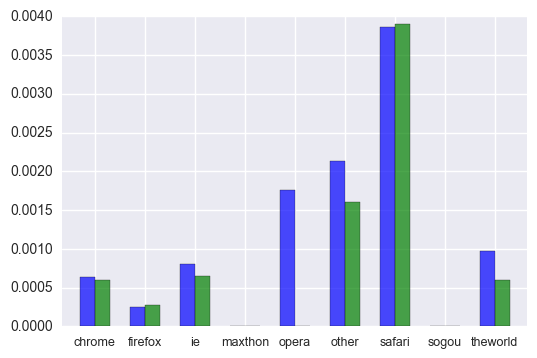

In [35]:
# Set the x-axis
w = 0.3 # width of the bar
left = np.arange(len(np.array(bs_1458['CTR'])))

plt.subplot()
plot = plt.bar(left, np.array(bs_1458['CTR']), width=0.3, align="center", color = 'b', alpha=0.7)
plot = plt.bar(left + w, np.array(bs_3358['CTR']), width=0.3, align="center", color = 'g', alpha=0.7)
plt.legend()
plt.xlim(-0.5, 8.8)
plt.xticks(left + w/2, ['chrome', 'firefox', 'ie', 'maxthon', 'opera', 'other', 'safari', 'sogou', 'theworld'], fontsize=9)
plt.show()

# Region

In [36]:
region1458 = df_1458[["click", 'region']] 
region3358 = df_3358[["click", 'region']]

In [37]:
region1458_g = region1458.groupby('region')
region3358_g = region3358.groupby('region')

n_of_click_1458 = region1458_g.sum().click
n_of_click_3358 = region3358_g.sum().click

In [38]:
n_of_impressions1458 = pd.DataFrame(region1458['region'].value_counts().sort_index(ascending=True))
n_of_impressions3358 = pd.DataFrame(region3358['region'].value_counts().sort_index(ascending=True))

In [39]:
region1458_graph = pd.concat([n_of_click_1458, n_of_impressions1458], axis = 1)
region3358_graph = pd.concat([n_of_click_3358, n_of_impressions3358], axis = 1)

In [40]:
region1458_graph['CTR'] = region1458_graph['click']/region1458_graph['region'].astype(int)
region3358_graph['CTR'] = region3358_graph['click']/region3358_graph['region'].astype(int)

In [41]:
region1458_graph.index

Int64Index([  0,   1,   2,   3,  15,  27,  40,  55,  65,  79,  80,  94, 106,
            124, 134, 146, 164, 183, 201, 216, 238, 253, 275, 276, 298, 308,
            325, 333, 344, 359, 368, 374, 393, 394, 395],
           dtype='int64', name='region')

/Users/nishimuraaki/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


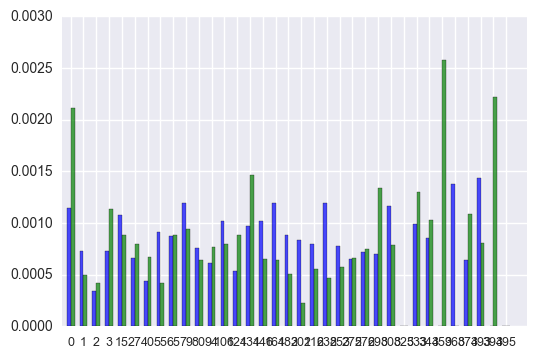

In [42]:
# Set the x-axis
w = 0.3 # width of the bar
left = np.arange(len(np.array(region1458_graph['CTR'])))
plt.subplot()
plot = plt.bar(left, np.array(region1458_graph['CTR']), width=0.3, align="center", color = 'b', alpha=0.7)
plot = plt.bar(left + w, np.array(region3358_graph['CTR']), width=0.3, align="center", color = 'g', alpha=0.7)
plt.legend()
plt.xlim(-0.5, 35.8)
plt.xticks(left + w/2, region1458_graph.index, fontsize=9)
plt.show()

# Slot size

In [43]:
ssize1458 = df_1458[["click", 'slotwidth', 'slotheight']] 
ssize3358 = df_3358[["click", 'slotwidth', 'slotheight']]

In [44]:
# ssize1458.to_csv('ssize1458.csv', index=False)
# ssize3358.to_csv('ssize3358.csv', index=False)

In [45]:
ssize1458 = pd.read_csv('ssize1458.csv')
ssize3358 = pd.read_csv('ssize3358.csv')

In [46]:
#ssize1458

In [47]:
ssize1458_g = ssize1458.groupby('label')
ssize3358_g = ssize3358.groupby('label')

n_of_click_1458 = ssize1458_g.sum().click
n_of_click_3358 = ssize3358_g.sum().click

In [48]:
n_of_click_1458

label
1000*90    128
160*600     44
250*250      9
300*250     46
336*280     84
468*60      15
728*90     120
960*90       5
Name: click, dtype: int64

In [49]:
n_of_impressions1458 = pd.DataFrame(ssize1458['label'].value_counts().sort_index(ascending=True))
n_of_impressions3358 = pd.DataFrame(ssize3358['label'].value_counts().sort_index(ascending=True))

In [50]:
n_of_impressions1458

,label
1000*90,146187
160*600,58837
250*250,27343
300*250,37512
336*280,116663
468*60,21801
728*90,118035
960*90,13915


In [51]:
ssize1458_graph = pd.concat([n_of_click_1458, n_of_impressions1458], axis = 1)
ssize3358_graph = pd.concat([n_of_click_3358, n_of_impressions3358], axis = 1)

In [52]:
ssize1458_graph['CTR'] = ssize1458_graph['click']/ssize1458_graph['label'].astype(int)
ssize3358_graph['CTR'] = ssize3358_graph['click']/ssize3358_graph['label'].astype(int)

In [53]:
ssize1458_graph

,click,label,CTR
label,,,
1000*90,128,146187,0.000876
160*600,44,58837,0.000748
250*250,9,27343,0.000329
300*250,46,37512,0.001226
336*280,84,116663,0.000720
468*60,15,21801,0.000688
728*90,120,118035,0.001017
960*90,5,13915,0.000359


In [54]:
# Depict the graph with the x-axis which is the order of the slot size
ssize_graph = pd.concat([ssize1458_graph['CTR'], ssize3358_graph['CTR']], axis = 1)
ssize_graph.columns = ['1458_CTR', '3358_CTR']
# ssize_graph['index'] = ssize_graph.index
# ssize_graph
ssize_graph['order'] = [4, 8, 2, 11, 10, 7, 3, 1, 12, 9, 6, 5] 

In [55]:
ascend_ssize_graph = ssize_graph.sort('order')

/Users/nishimuraaki/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


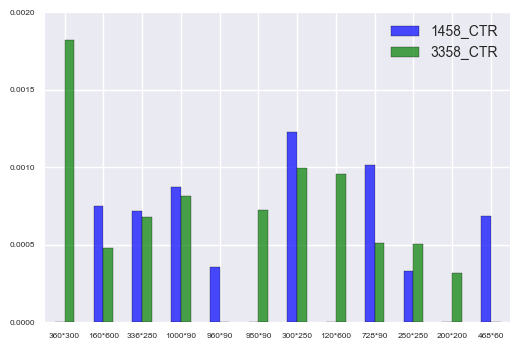

In [56]:
ascend_ssize_graph = ascend_ssize_graph.drop('order', 1)
ascend_ssize_graph.plot.bar(color=['b', 'g'], width=0.5, alpha=0.7, rot=0, fontsize=6)

==> See the difference of the CTR in the order of slot size.

In [57]:
# Do not care about the order of the size
ssize_graph = ssize_graph.drop('order', axis=1)

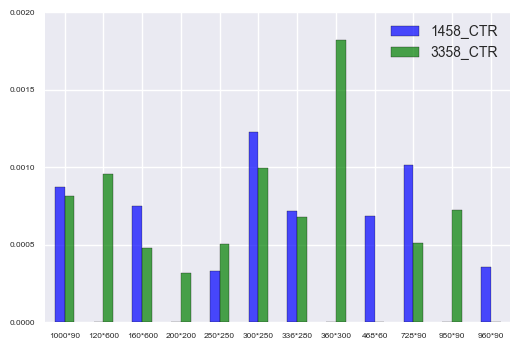

In [58]:
ssize_graph.plot.bar(color=['b', 'g'], width=0.5, alpha=0.7, rot=0, fontsize=6)

# Adexchange

In [59]:
adex1458 = df_1458[["click", 'adexchange']] 
adex3358 = df_3358[["click", 'adexchange']]

In [60]:
adex1458_g = adex1458.groupby('adexchange')
adex3358_g = adex3358.groupby('adexchange')

n_of_click_1458 = adex1458_g.sum().click
n_of_click_3358 = adex3358_g.sum().click

In [61]:
n_of_impressions1458 = pd.DataFrame(adex1458['adexchange'].value_counts().sort_index(ascending=True))
n_of_impressions3358 = pd.DataFrame(adex3358['adexchange'].value_counts().sort_index(ascending=True))

In [62]:
adex1458_graph = pd.concat([n_of_click_1458, n_of_impressions1458], axis = 1)
adex3358_graph = pd.concat([n_of_click_3358, n_of_impressions3358], axis = 1)

In [63]:
adex1458_graph['CTR'] = adex1458_graph['click']/adex1458_graph['adexchange'].astype(int)
adex3358_graph['CTR'] = adex3358_graph['click']/adex3358_graph['adexchange'].astype(int)

In [64]:
adex3358_graph

,click,adexchange,CTR
adexchange,,,
1,146,159379,0.000916
2,48,93691,0.000512
3,39,51712,0.000754


/Users/nishimuraaki/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


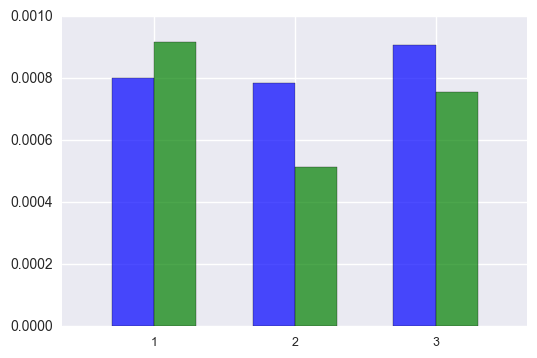

In [65]:
# set x-axis
w = 0.3 # width of the bar
left = np.arange(len(np.array(adex1458_graph['CTR'])))
plt.subplot()

plt.subplot()
plot = plt.bar(left, np.array(adex1458_graph['CTR']), width=0.3, align="center", color = 'b', alpha=0.7)
plot = plt.bar(left + w, np.array(adex3358_graph['CTR']), width=0.3, align="center", color = 'g', alpha=0.7)
plt.legend()
plt.xlim(-0.5, 2.8)
plt.xticks(left + w/2, ['1', '2', '3'], fontsize=9)
plt.show()

In [66]:
adex1458_graph.index

Index(['1', '2', '3'], dtype='object', name='adexchange')

# ALL

/Users/nishimuraaki/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


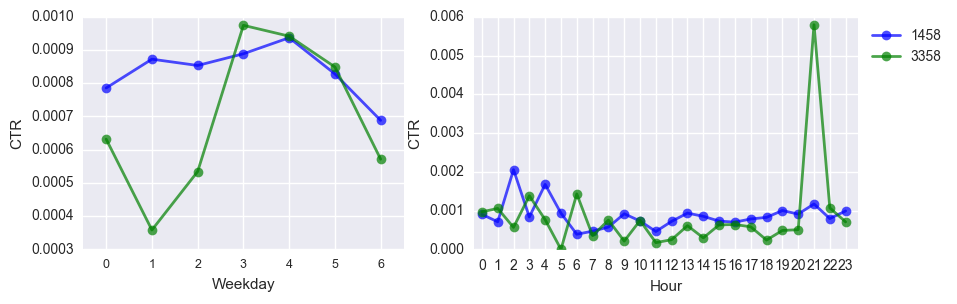

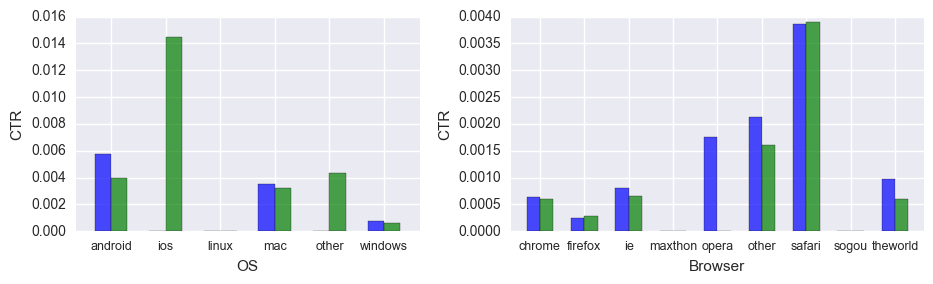

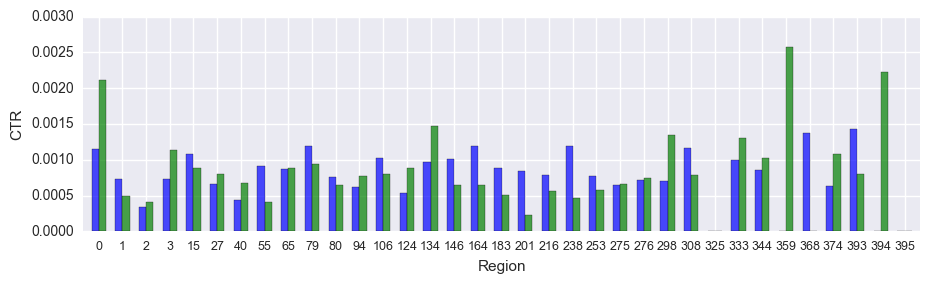

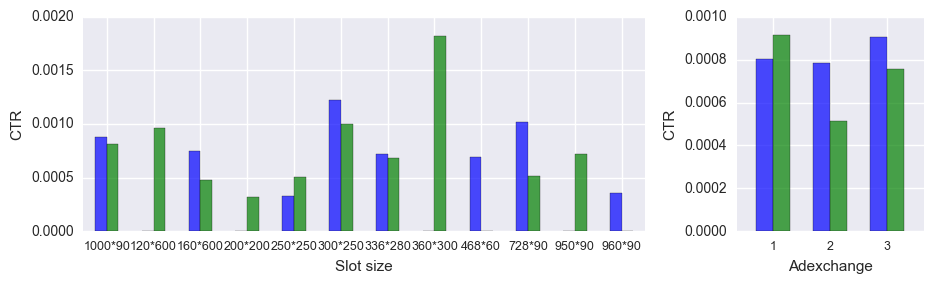

In [69]:
plt.rc('font', size=12)

fig = plt.figure(figsize=(10,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 3]) 
alpha = 0.6

ax0 = plt.subplot(gs[0])
#ax0 = plt.subplot2grid((3,3), (0,0), colspan=1)
plt.plot(weekday1458_graph["CTR"], 'o-', linewidth=2, color = 'b', alpha=0.7)
plt.plot(weekday3358_graph["CTR"], 'o-', linewidth=2, color = 'g', alpha=0.7)
#plt.legend()
plt.xlim(-0.5, 6.5)
plt.xticks(weekday1458_graph.index, fontsize=9)
ax0.set_xlabel('Weekday')
ax0.set_ylabel('CTR')

ax1 = plt.subplot(gs[1])
#ax1 = plt.subplot2grid((3,3), (0,1), colspan=2)
plt.plot(hour_1458["1458"], 'o-', linewidth=2, color = 'b', alpha=0.7)
plt.plot(hour_3358["3358"], 'o-', linewidth=2, color = 'g', alpha=0.7)
ax1.set_xlabel('Hour')
ax1.set_ylabel('CTR')
#ax0.legend(loc='upper left')
plt.xlim(-0.5, 23.8)
plt.xticks(range(24))
ax1.legend(bbox_to_anchor=(1.25, 1))

################
plt.rc('font', size=12)
fig = plt.figure(figsize=(9.5,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 3]) 
alpha = 0.6

ax2 = plt.subplot(gs[0])
os_w = 0.3 # 棒の幅
os_left = np.arange(len(np.array(os1458_graph)))
plt.bar(os_left, np.array(os1458_graph), width=0.3, align="center", color = 'b',alpha=0.7)
plt.bar(os_left + os_w, np.array(os3358_graph), width=0.3, align="center", color = 'g', alpha=0.7)
ax2.set_xlabel('OS')
ax2.set_ylabel('CTR')
#ax0.legend(loc='upper left')
plt.xlim(-0.5, 5.8)
plt.xticks(os_left + os_w/2, ['android', 'ios', 'linux', 'mac', 'other', 'windows'], fontsize=9)
ax2.legend(loc='best')

ax3 = plt.subplot(gs[1])
bs_w = 0.3 # 棒の幅
bs_left = np.arange(len(np.array(bs_1458['CTR'])))
plt.bar(bs_left, np.array(bs_1458['CTR']), width=0.3, align="center", color = 'b', alpha=0.7)
plt.bar(bs_left + w, np.array(bs_3358['CTR']), width=0.3, align="center", color = 'g', alpha=0.7)
ax3.set_xlabel('Browser')
ax3.set_ylabel('CTR')
#ax0.legend(loc='upper left')
plt.xlim(-0.5, 8.8)
plt.xticks(bs_left + bs_w/2, ['chrome', 'firefox', 'ie', 'maxthon', 'opera', 'other', 'safari', 'sogou', 'theworld'], fontsize=9)
ax3.legend(loc='best')

plt.tight_layout()

################
plt.rc('font', size=12)
fig = plt.figure(figsize=(19.5,3))
gs = gridspec.GridSpec(1, 1, width_ratios=[2.5, 3]) 
alpha = 0.6

ax4 = plt.subplot(gs[0])
region_w = 0.3 # 棒の幅
region_left = np.arange(len(np.array(region1458_graph['CTR'])))
plt.bar(region_left, np.array(region1458_graph['CTR']), width=0.3, align="center", color = 'b', alpha=0.7)
plt.bar(region_left + region_w, np.array(region3358_graph['CTR']), width=0.3, align="center", color = 'g', alpha=0.7)
ax4.set_xlabel('Region')
ax4.set_ylabel('CTR')
#ax0.legend(loc='upper left')
plt.xlim(-0.5, 34.8)
plt.xticks(region_left + region_w/2, region1458_graph.index, fontsize=9)
ax4.legend(loc='best')

plt.tight_layout()

######################
plt.rc('font', size=12)
fig= plt.figure(figsize=(9.5,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
alpha = 0.6

ax5 = plt.subplot(gs[0])
ssize_graph.plot.bar(ax = ax5, color=['b', 'g'], width=0.5, alpha=0.7, rot=0, fontsize=9, legend=False)
ax5.set_xlabel('Slot size')
ax5.set_ylabel('CTR')
plt.yticks(fontsize=10)

ax6 = plt.subplot(gs[1])
adex_w = 0.3 # 棒の幅
adex_left = np.arange(len(np.array(adex1458_graph['CTR'])))

plt.bar(adex_left, np.array(adex1458_graph['CTR']), width=0.3, align="center", color = 'b', alpha=0.7)
plt.bar(adex_left + adex_w, np.array(adex3358_graph['CTR']), width=0.3, align="center", color = 'g', alpha=0.7)
plt.legend()
plt.xlim(-0.5, 2.8)
plt.xticks(adex_left + adex_w/2, ['1', '2', '3'], fontsize=9)
ax6.set_xlabel('Adexchange')
ax6.set_ylabel('CTR')
plt.tight_layout()


plt.tight_layout()
#plt.show()
fig.savefig("graphs_userfeedback.png")